# DBSCAN

### DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a clustering algorithm used in machine learning and data mining. It is a density-based algorithm that groups together points that are close to each other based on a set distance metric, and identifies points that are not part of any cluster as noise.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
blobs=pd.read_csv('../data/cluster_blobs.csv')

In [4]:
circle=pd.read_csv('../data/cluster_circles.csv')

In [5]:
moons=pd.read_csv('../data/cluster_moons.csv')

In [7]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


In [9]:
circle.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


In [10]:
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


### plotting blobs data.

<AxesSubplot: xlabel='X1', ylabel='X2'>

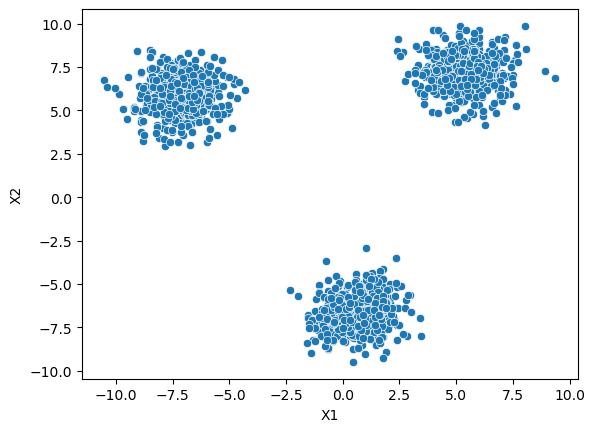

In [11]:
sns.scatterplot(data=blobs,x='X1',y='X2')

### plotting Circles data.

<AxesSubplot: xlabel='X1', ylabel='X2'>

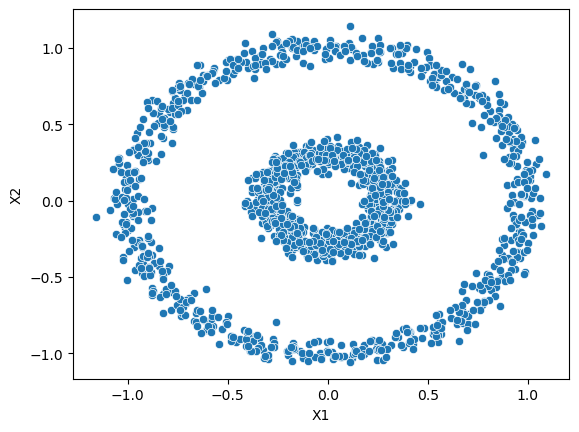

In [12]:
sns.scatterplot(data=circle,x='X1',y='X2')

### plotting moons data.

<AxesSubplot: xlabel='X1', ylabel='X2'>

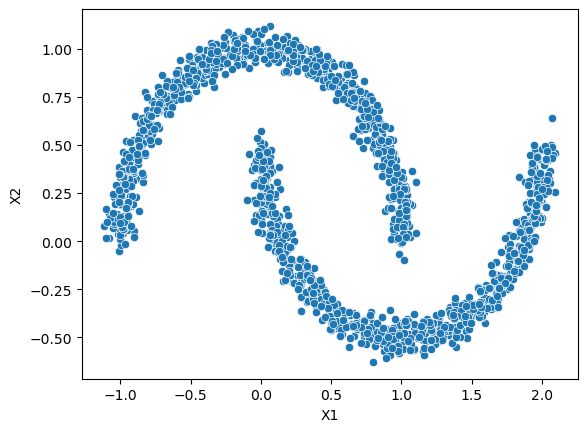

In [13]:
sns.scatterplot(data=moons,x='X1',y='X2')

### creating a function to test different models

In [36]:
def report(model,data):
    pred=model.fit_predict(data)
    sns.scatterplot(data=data,x='X1',y='X2',hue=pred,palette='Dark2')

In [24]:
from sklearn.cluster import KMeans

In [16]:
from sklearn.cluster import DBSCAN

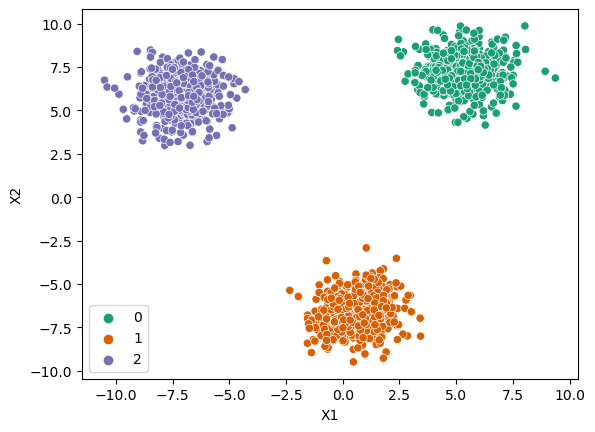

In [47]:
kmean=KMeans(n_clusters=3,n_init=10)
report(kmean,blobs)


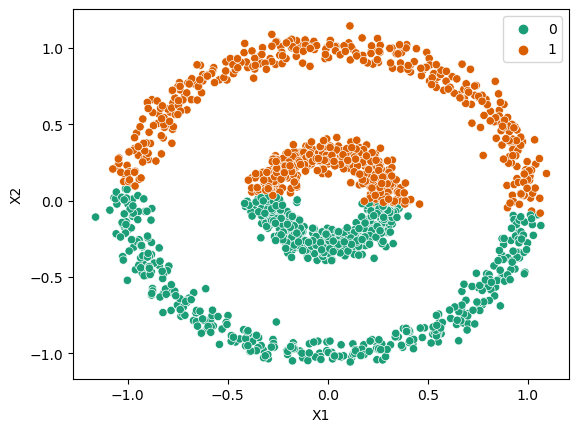

In [48]:
kmean=KMeans(n_clusters=2,n_init=10)
report(kmean,circle)

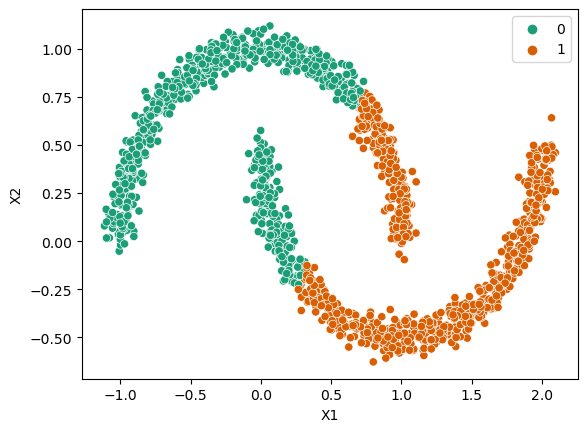

In [49]:
kmean=KMeans(n_clusters=2,n_init=10)
report(kmean,moons)

### lets see how DBSCAN does Clustering.

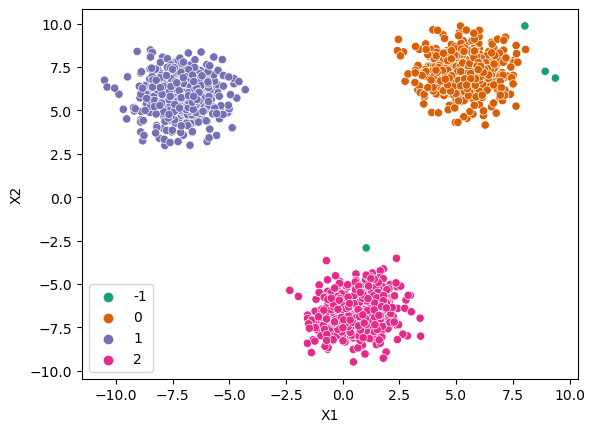

In [52]:
db=DBSCAN(eps=1)
report(db,blobs)

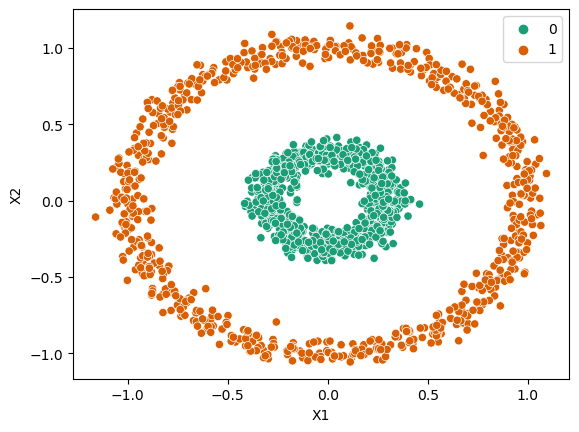

In [53]:
db=DBSCAN(eps=0.15)
report(db,circle)

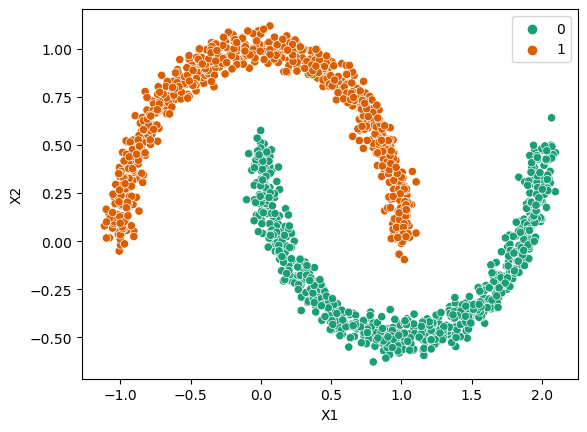

In [55]:
db=DBSCAN(eps=0.2)
report(db,moons)

### The algorithm works by first selecting a point at random and finding all the points within the epsilon radius. If there are at least minPts points within the radius, a cluster is formed. Then, the algorithm repeats the process with another unvisited point until all points are visited. Points that are not part of any cluster are classified as noise or outliers.

### prediction using DBSCAN.

In [91]:
df=pd.read_csv('../data/cluster_two_blobs_outliers.csv')

In [92]:
df.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
scaler=StandardScaler()

In [95]:
scaled_x=scaler.fit_transform(df)

In [96]:
db=DBSCAN()

In [97]:
predict=db.fit_predict(scaled_x)

In [98]:
predict

array([ 0,  1,  0, ..., -1, -1, -1])

<AxesSubplot: xlabel='X1', ylabel='X2'>

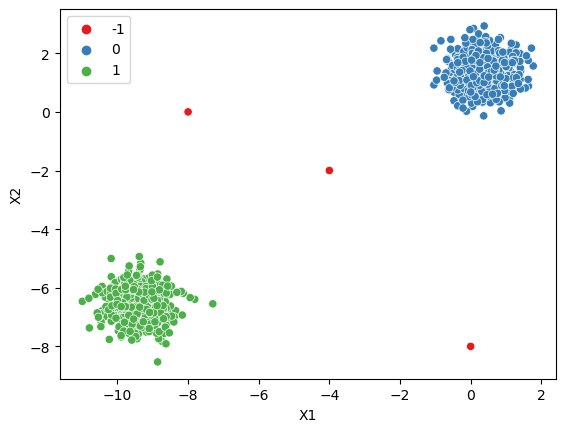

In [103]:
sns.scatterplot(df,x='X1',y='X2',hue=predict,palette='Set1')

### finding the outlier percentage.

In [108]:
outliers=[]
outliers_percentage=[]
for eps in np.linspace(0.01,10,100):
    db=DBSCAN(eps=eps)
    pred=db.fit_predict(scaled_x)
    outliers.append(np.sum(db.labels_==-1))
    outliers_percentage.append(100*np.sum(db.labels_==-1)/len(db.labels_))


(0.0, 10.0)

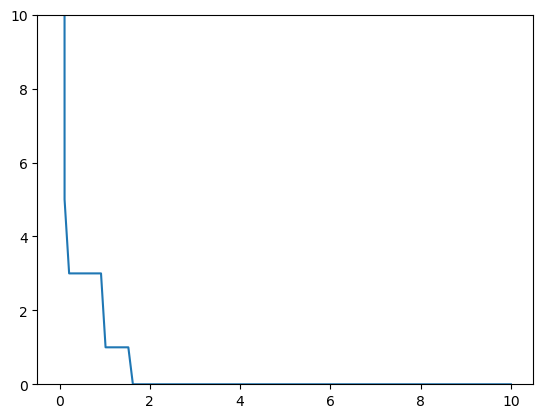

In [109]:
plt.plot(np.linspace(0.01,10,100),outliers)
plt.ylim(0,10)

### One of the advantages of DBSCAN is that it can find clusters of any shape, unlike other clustering algorithms like k-means which can only find spherical clusters. Additionally, DBSCAN can handle outliers and noise well, as these points are classified as noise and not assigned to any cluster.